In [3]:
# --------------------
# import packages 
# --------------------

import h5py
import math
import numpy as np
import matplotlib as mpl

from cospy.interface import * 
%matplotlib inline  

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sympy.interactive import printing
printing.init_printing(use_latex=True)

from IPython.display import display, HTML
from ipywidgets import interact, interactive, fixed
from IPython.html import widgets

import matplotlib.pyplot as plt
import matplotlib.animation as animation


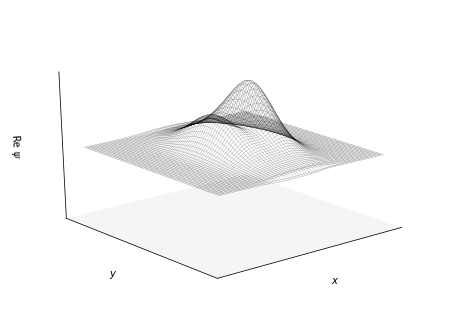

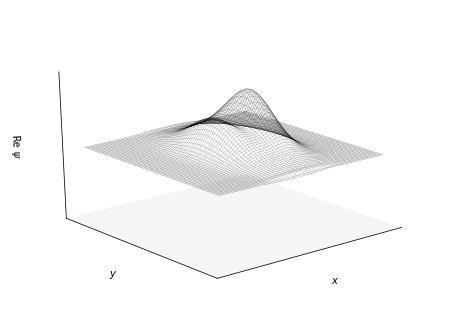

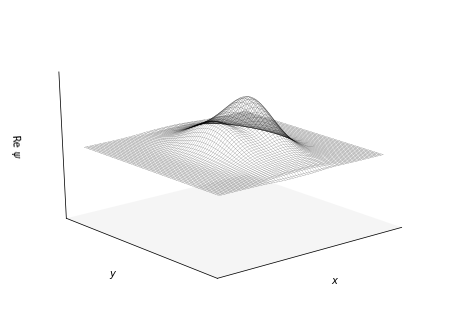

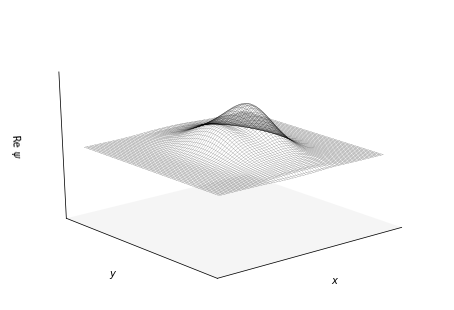

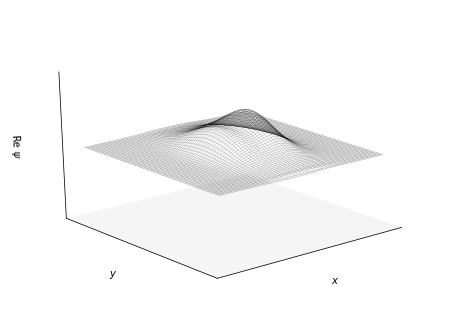

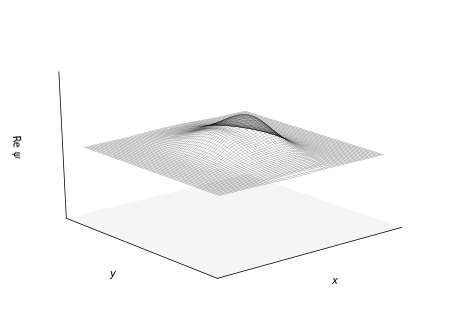

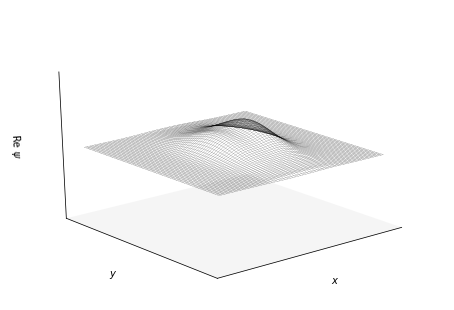

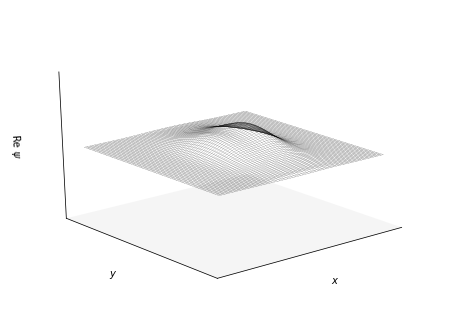

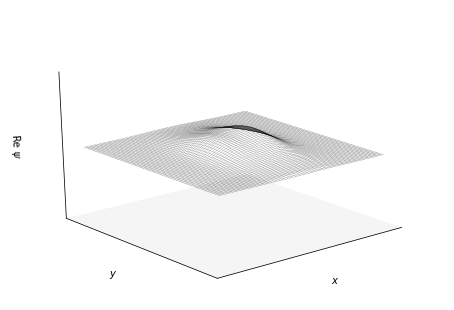

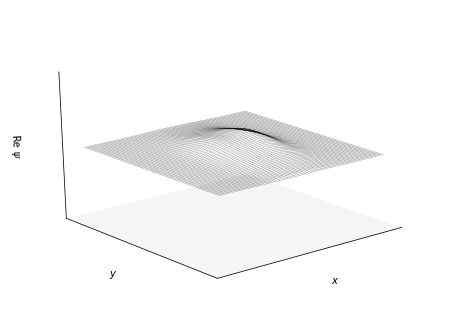

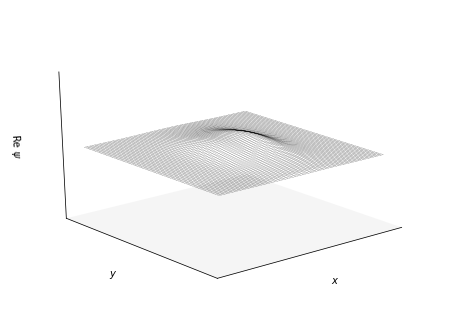

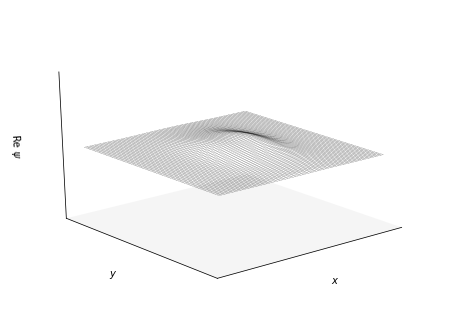

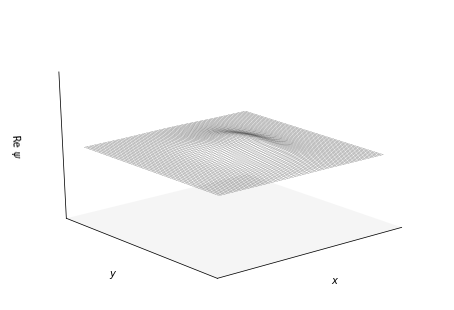

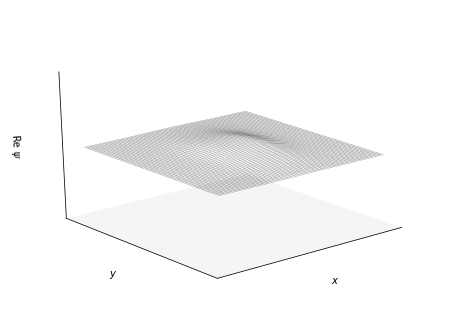

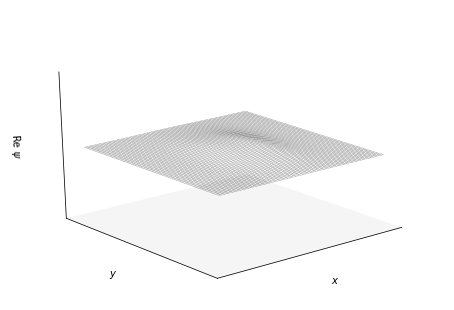

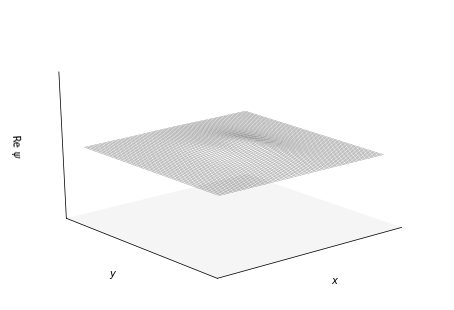

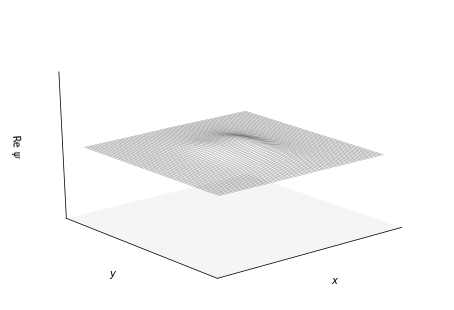

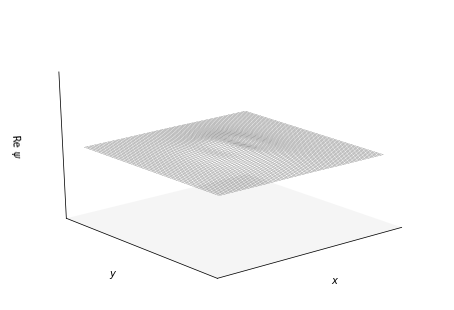

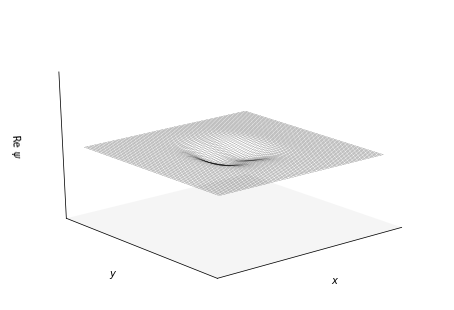

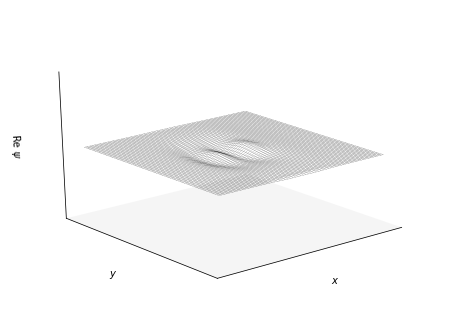

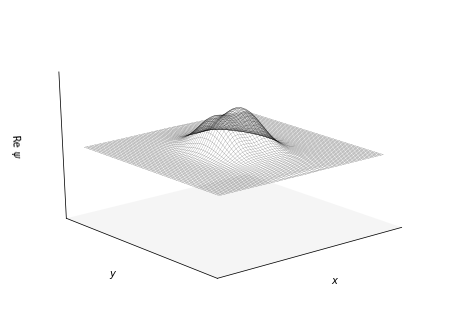

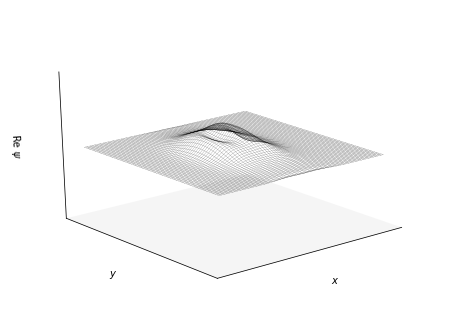

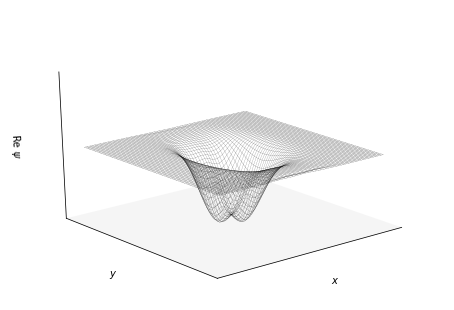

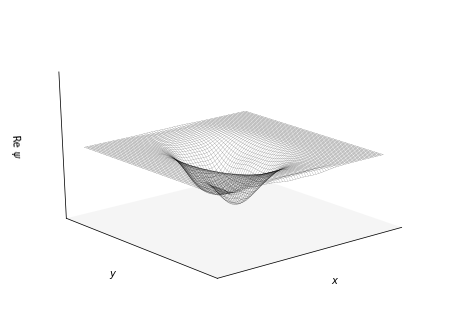

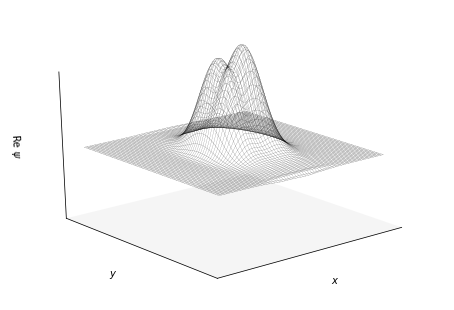

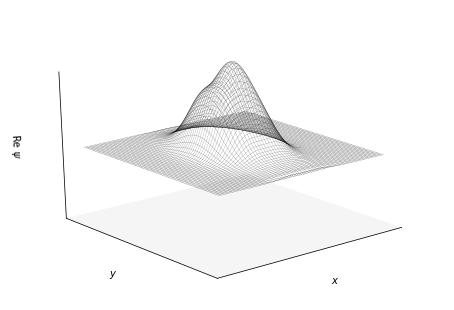

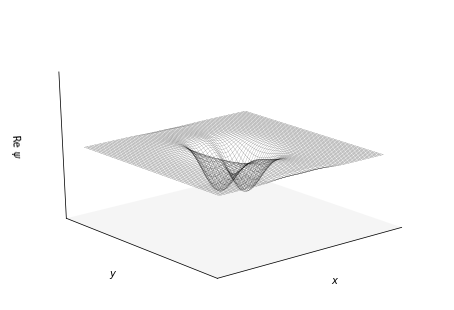

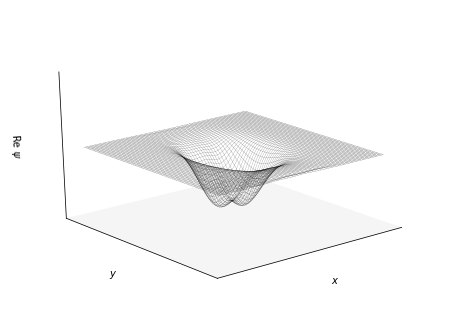

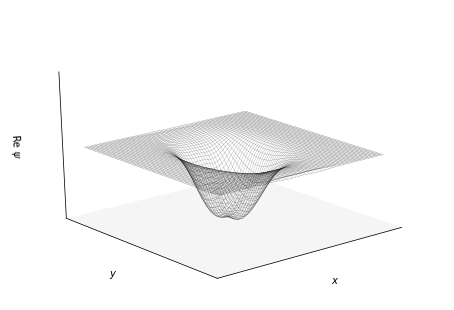

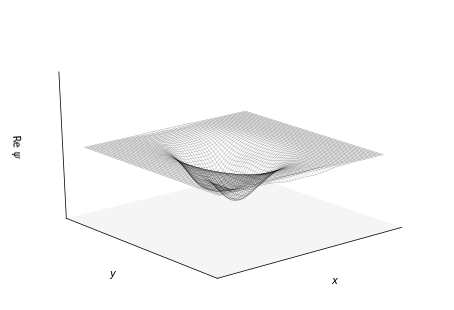

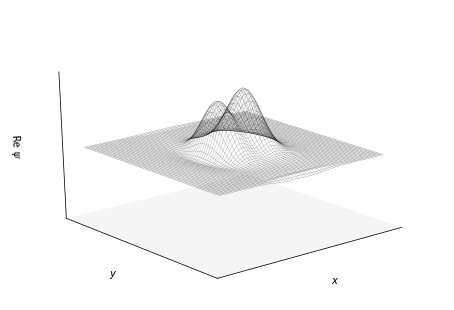

In [14]:
# --------------------
# maps wavefunction
# --------------------

file_sp ='/Users/fuentes/workspace/sp_x4_64b_t12/output.h5'
data_sp = h5py.File(file_sp)

# --------------------

nz = data_sp['coordinates/z'][0,0,:].shape[0]
z_slider = widgets.IntSlider(min=0,max=nz-1,value=1,description='Z index')

# --------------------

w = list()

U = data_sp['psiR/1'][:,30:100,65]
w.append(np.linalg.norm(U.flatten()))


def plot_timestep(zi):

    fig = plt.figure()
    fig.clf()
    ax = Axes3D(fig)

    X = data_sp['coordinates/x'][:,30:100,zi]
    Y = data_sp['coordinates/y'][:,30:100,zi]
    U = data_sp['psiR/1'][:,30:100,zi]

    v=U/w
    
    ax.plot_wireframe(X, Y, v, color = 'Black',linewidth=.125)
    ax.w_xaxis.set_pane_color((1.0,1.0,1.0))
    ax.w_yaxis.set_pane_color((1.0,1.0,1.0))
    ax.view_init(elev=25,azim=50)  
    ax.grid(b=False)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('Re $\psi$')
    
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.gca().zaxis.set_major_locator(plt.NullLocator())    
    
    ax.set_zlim3d([-.02,.02])
    
    fig.savefig('sec_'+ str(zi) + '.png', dpi=300)

#interact(plot_timestep, zi = z_slider)

for i in range(80,111):
    plot_timestep(i)
    